## Importing Modules and Zillow Data (csv)

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from numerize.numerize import numerize as nz # Easy number formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,StrMethodFormatter, FuncFormatter, AutoMinorLocator)

In [2]:
# Load All Homes CSV file
Neighborhood_Zori_AllHomes = pd.read_csv('Data/City_zori_sm_month.csv',index_col=[5,7,6,2])
Neighborhood_Zhvi_AllHomes = pd.read_csv('Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_2bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])
# Neighborhood_Zhvi_3bedroom = pd.read_csv('Data/Neighborhood_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',index_col=[5,7,8,6,2])

In [3]:
Neighborhood_Zhvi_AllHomes.index.to_frame().describe()

,State,Metro,CountyName,City,RegionName
count,21492,21480,21492,21491,21492
unique,51,302,419,884,16644
top,TX,"Dallas-Fort Worth-Arlington, TX",Maricopa County,Nashville,Downtown
freq,3157,1575,854,421,154


In [4]:

Neighborhood_Zori_AllHomes.index.to_frame().describe()

,State,CountyName,Metro,RegionName
count,2619,2619,2616,2619
unique,51,616,449,2296
top,CA,Los Angeles County,"New York-Newark-Jersey City, NY-NJ-PA",Springfield
freq,321,65,124,8


## Transforming Data to Time series

In [5]:
zori_timeseries = Neighborhood_Zori_AllHomes.T
dates = pd.to_datetime(zori_timeseries.index, errors='coerce').dropna()
zori_timeseries = zori_timeseries.loc[dates.strftime("%Y-%m-%d")]
zori_timeseries.set_index(dates, inplace=True)
zori_timeseries.head()

State,NY,CA,TX,IL,TX,AZ,PA,NV,CA,TX,...,GA,NC,LA,NY,IL,TX,FL,NY,KS,MD
CountyName,Queens County,Los Angeles County,Harris County,Cook County,Bexar County,Maricopa County,Philadelphia County,Clark County,San Diego County,Dallas County,...,Clayton County,Carteret County,West Baton Rouge Parish,Suffolk County,Cook County,Travis County,Palm Beach County,Suffolk County,Riley County,Prince Georges County
Metro,"New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","Houston-The Woodlands-Sugar Land, TX","Chicago-Naperville-Elgin, IL-IN-WI","San Antonio-New Braunfels, TX","Phoenix-Mesa-Chandler, AZ","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Las Vegas-Henderson-Paradise, NV","San Diego-Chula Vista-Carlsbad, CA","Dallas-Fort Worth-Arlington, TX",...,"Atlanta-Sandy Springs-Alpharetta, GA","Morehead City, NC","Baton Rouge, LA","New York-Newark-Jersey City, NY-NJ-PA","Chicago-Naperville-Elgin, IL-IN-WI","Austin-Round Rock-Georgetown, TX","Miami-Fort Lauderdale-Pompano Beach, FL","New York-Newark-Jersey City, NY-NJ-PA","Manhattan, KS","Washington-Arlington-Alexandria, DC-VA-MD-WV"
RegionName,New York,Los Angeles,Houston,Chicago,San Antonio,Phoenix,Philadelphia,Las Vegas,San Diego,Dallas,...,Lovejoy,Emerald Isle,Addis,Upton,Golf,San Leanna,South Palm Beach,Amagansett,Ogden,Upper Marlboro
2015-03-31,2585.6889,1946.783507,1299.402569,1512.62615,1008.558187,926.484176,1255.716767,1040.27107,1841.24916,1172.903579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,2609.168132,1957.261756,1307.461791,1528.316363,1016.74853,942.081186,1263.226175,1049.533383,1854.951241,1181.160464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,2632.046477,1975.079103,1318.354016,1542.472583,1026.407644,946.802452,1274.681159,1055.04147,1860.271255,1196.904407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,2654.783113,1988.369156,1328.504639,1573.811799,1033.734039,954.749036,1282.066182,1064.140493,1866.663225,1209.624206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,2669.912795,2008.013659,1332.495637,1581.611674,1037.29535,954.72145,1286.248231,1069.539445,1877.640342,1221.043208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
zhvi_timeseries = Neighborhood_Zhvi_AllHomes.T
dates = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()
zhvi_timeseries = zhvi_timeseries.loc[dates.strftime("%Y-%m-%d")]
zhvi_timeseries.index = pd.to_datetime(zhvi_timeseries.index, errors='coerce').dropna()
zhvi_timeseries.head()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2000-01-31,81974.0,153332.0,148473.0,555357.0,154777.0,392005.0,156540.0,137030.0,134200.0,165396.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,82304.0,153428.0,148433.0,559325.0,154662.0,396040.0,156473.0,137233.0,134188.0,166891.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,82711.0,153458.0,148752.0,563258.0,154915.0,398802.0,156748.0,137629.0,134484.0,167749.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,83594.0,153713.0,149375.0,571724.0,155573.0,405873.0,157374.0,138344.0,135090.0,170097.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,84481.0,153888.0,150104.0,582366.0,156590.0,413360.0,158077.0,139230.0,135774.0,171704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Indexing (Accessing Data)

In [7]:
zhvi_timeseries.iloc[-1].loc['WY']

Metro           CountyName    City     RegionName       
Jackson, WY-ID  Teton County  Jackson  Rafter J Ranch       1258822.0
                                       South Park           2491042.0
                              Wilson   Moose Wilson Road    2081204.0
                              Jackson  Hoback               1657785.0
Name: 2022-12-31 00:00:00, dtype: object

In [50]:
zhvi_timeseries.iloc[-1].groupby(level='State').mean().sort_values(ascending=False).head(5).index.values

array(['WY', 'CA', 'HI', 'WA', 'DC'], dtype=object)

### Bar Plot Function Defintion

In [25]:
import matplotlib.ticker as mtick
def nice_axes(ax, axisformat='abs'):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=7, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    if axisformat == 'pct':
        fmt = mtick.PercentFormatter()
    elif axisformat == 'abs':
        fmt = FuncFormatter(nz)
    FuncFormatter(nz)
    ax.xaxis.set_major_formatter(fmt)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
def barplot_by_location(df, title, axisformat, **kwargs):
    df.sort_values(ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(7, 3.5), dpi=144)
    y = df.index.get_level_values(-1)
    width = df.values
    if axisformat=='pct': width = width * 100
    colors = plt.cm.Accent(range(len(df)))
    ax.barh(y=y, width=width, color=colors, **kwargs)
    ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
    # set minimum axis limits
    ax.set_xbound(lower=width.min()*0.75)
    ax.xaxis.set_label_text('ZHVI - $(USD)', fontsize=7, fontweight='light')
    nice_axes(ax, axisformat)
    return ax

In [26]:
zori_timeseries.iloc[-1].groupby(level='State').mean().sort_values(ascending=False).head(6)

State
NY    4829.389188
CA    2941.052376
HI    2712.126417
CO    2580.006530
NJ    2489.033709
MA    2480.190692
Name: 2022-12-31 00:00:00, dtype: float64

Top States by Housing Prices and Rents

In [43]:
top6states_p = zhvi_timeseries.iloc[-1].groupby(level='State').mean().sort_values(ascending=False).head(6)
top6states_r = zori_timeseries.iloc[-1].groupby(level='State').mean().sort_values(ascending=False).head(6)
top6cities_p = zhvi_timeseries.iloc[-1].groupby(level='City').mean().sort_values(ascending=False).head(6)
top6cities_r = zori_timeseries.iloc[-1].sort_values(ascending=False).head(6)

<AxesSubplot: title={'center': 'Average Home Prices by State in the US @ December 2022'}, xlabel='ZHVI - $(USD)'>

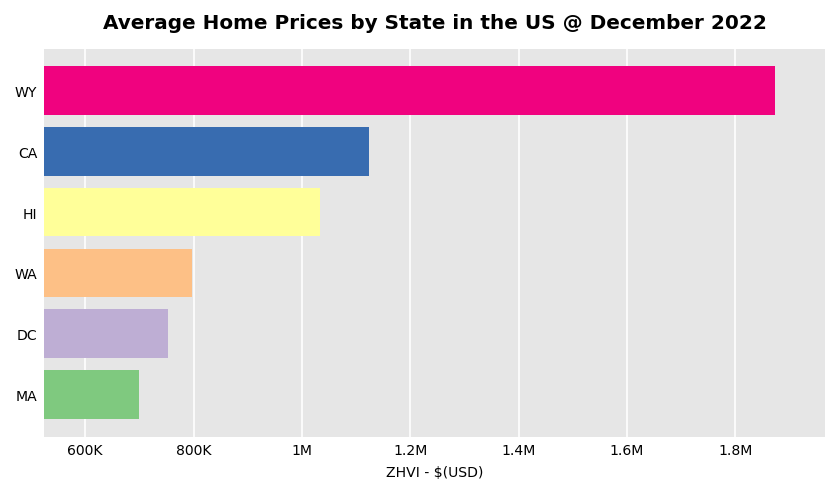

In [29]:
barplot_by_location(top6states_p, axisformat='abs',title='Average Home Prices by State in the US @ December 2022')

<AxesSubplot: title={'center': 'Average Rent by State in the US @ December 2022'}, xlabel='ZHVI - $(USD)'>

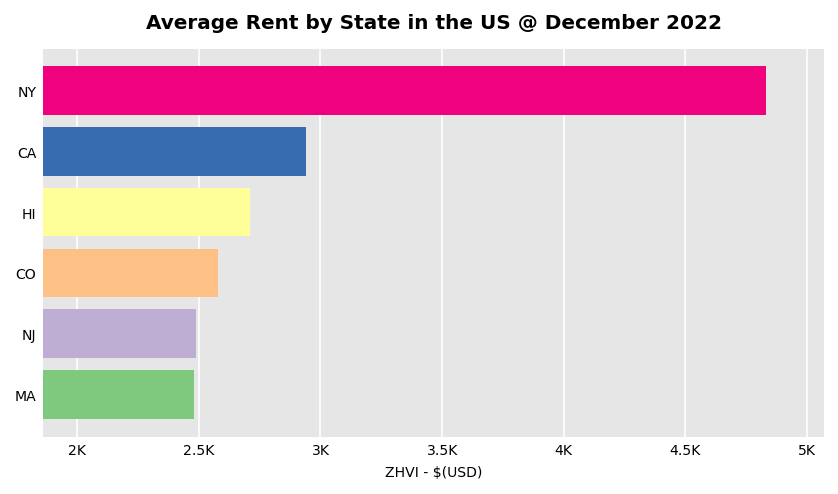

In [45]:
barplot_by_location(top6states_r, axisformat='abs',title='Average Rent by State in the US @ December 2022')

<AxesSubplot: title={'center': 'Average Rent by City in the US @ December 2022'}, xlabel='ZHVI - $(USD)'>

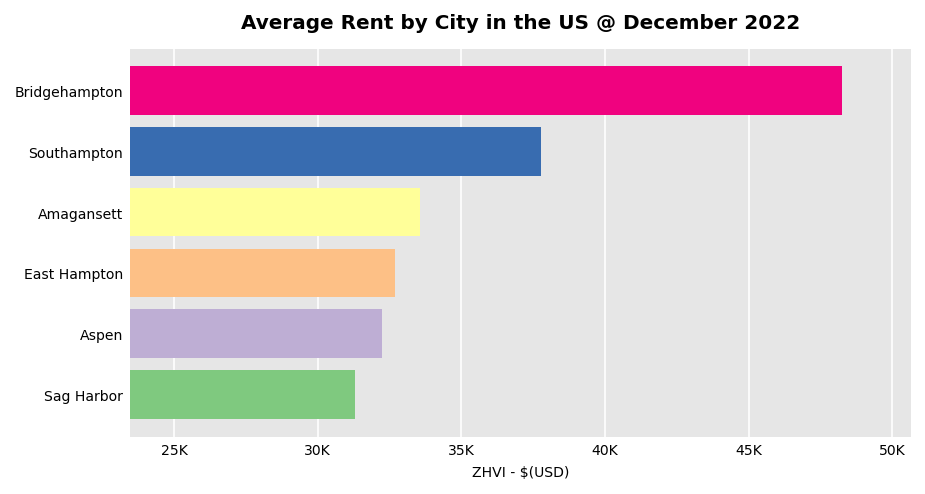

In [50]:
barplot_by_location(top6cities_r, axisformat='abs',title='Average Rent by City in the US @ December 2022')

<AxesSubplot: title={'center': 'Average Home Price by City in the US @ December 2022'}, xlabel='ZHVI - $(USD)'>

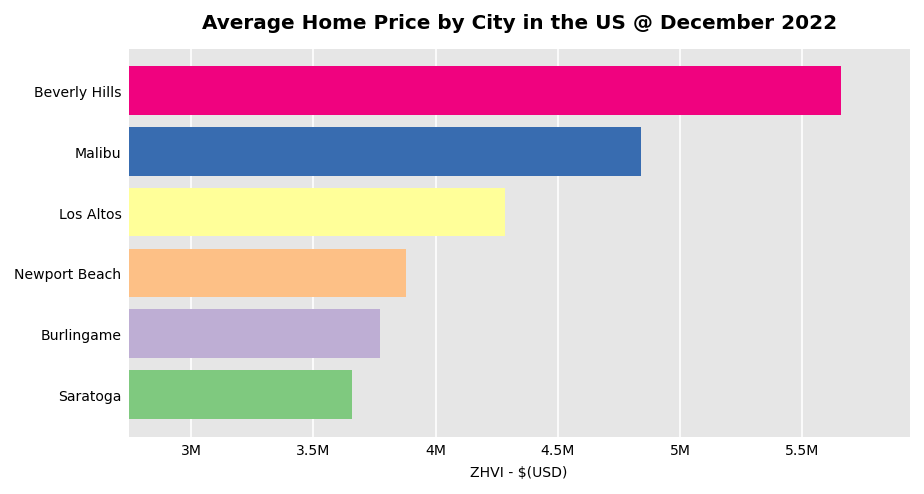

In [51]:
barplot_by_location(top6cities_p, axisformat='abs',title='Average Home Price by City in the US @ December 2022')

In [52]:
zori_timeseries.iloc[-1].groupby(level='RegionName').mean().sort_values(ascending=False).head(10)

RegionName
Bridgehampton      48240.666667
Southampton        37768.329365
Amagansett         33571.916667
East Hampton       32688.976496
Aspen              32222.222222
Sag Harbor         31286.083333
Montauk            25516.666667
Malibu             13414.921296
Montecito          11000.000000
Rancho Santa Fe    10957.500000
Name: 2022-12-31 00:00:00, dtype: float64

<AxesSubplot: title={'center': 'Average Home Prices by Region in CA @ December 2022'}, xlabel='ZHVI - $(USD)'>

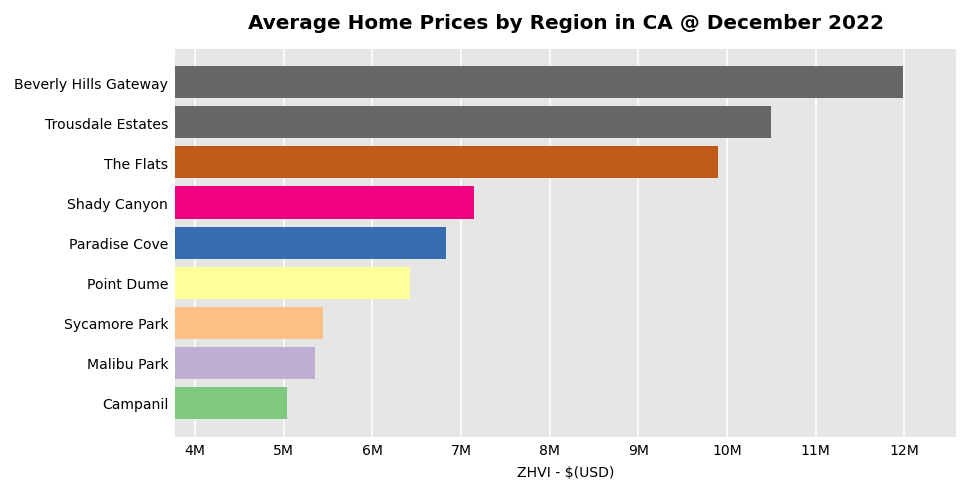

In [33]:

barplot_by_location(zhvi_timeseries[['CA']].iloc[-1].sort_values(ascending=False).head(9), title='Average Home Prices by Region in CA @ December 2022', axisformat='abs')

<AxesSubplot: title={'center': '3Y%Change in Mean Home Prices by State @ November 2022'}, xlabel='ZHVI - $(USD)'>

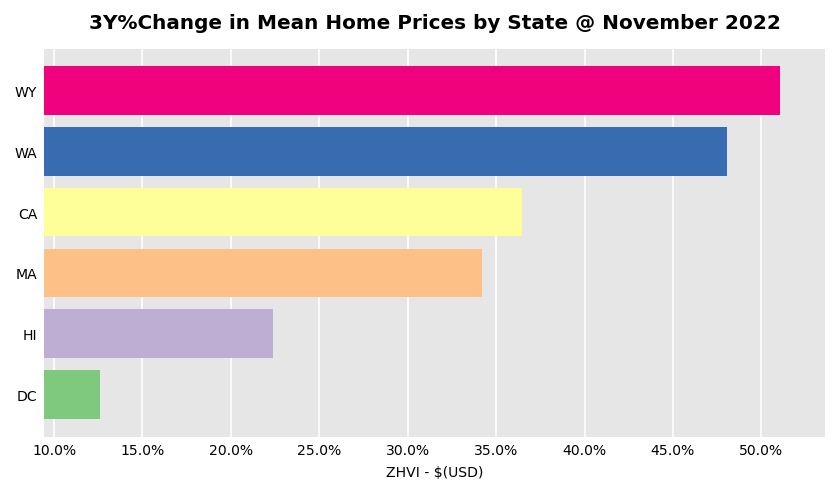

In [59]:
top6states_pct = zhvi_timeseries[top6states.index.get_level_values(-1).values].pct_change(periods=12*3).iloc[-1].groupby(level='State').mean().sort_values(ascending=False)
barplot_by_location(top6states_pct, axisformat = 'pct', title='3Y%Change in Mean Home Prices by State @ November 2022')

<AxesSubplot: title={'center': '3Y%Change in Mean Home Prices by State @ November 2022'}, xlabel='ZHVI - $(USD)'>

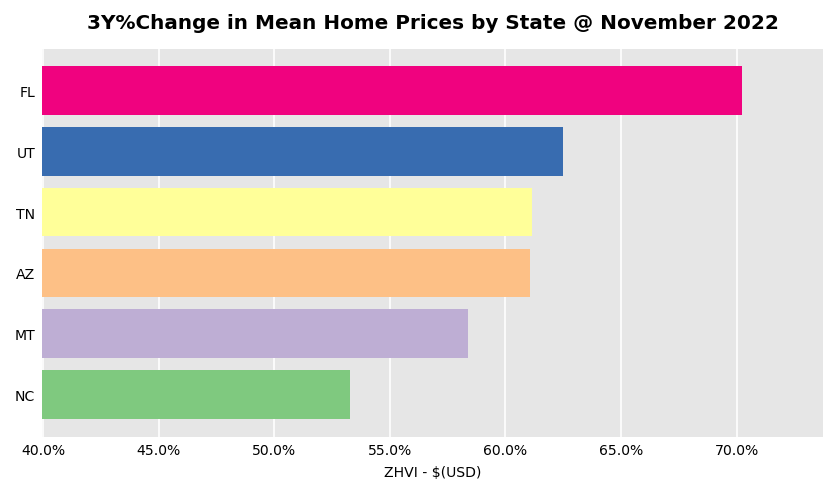

In [60]:
top6statesbypct = zhvi_timeseries.groupby(level='State',axis=1).mean().pct_change(periods=12*3).iloc[-1].sort_values(ascending=False).head(6)
barplot_by_location(top6statesbypct, axisformat = 'pct',title='3Y%Change in Mean Home Prices by State @ November 2022')

<AxesSubplot: title={'center': 'Mean Home Prices by State in the US @ November 2022'}, xlabel='ZHVI - $(USD)'>

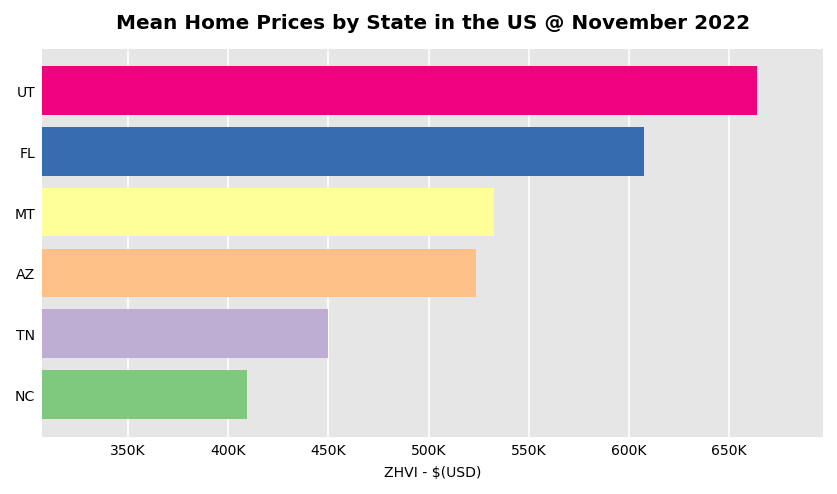

In [61]:
top6statesbypct_abs = zhvi_timeseries[top6statesbypct.index.get_level_values(-1).values].iloc[-1].groupby(level='State').mean().sort_values(ascending=False)
barplot_by_location(top6statesbypct_abs, axisformat = 'abs',title='Mean Home Prices by State in the US @ November 2022')

<AxesSubplot: title={'center': 'AllHomes'}, xlabel='[State]'>

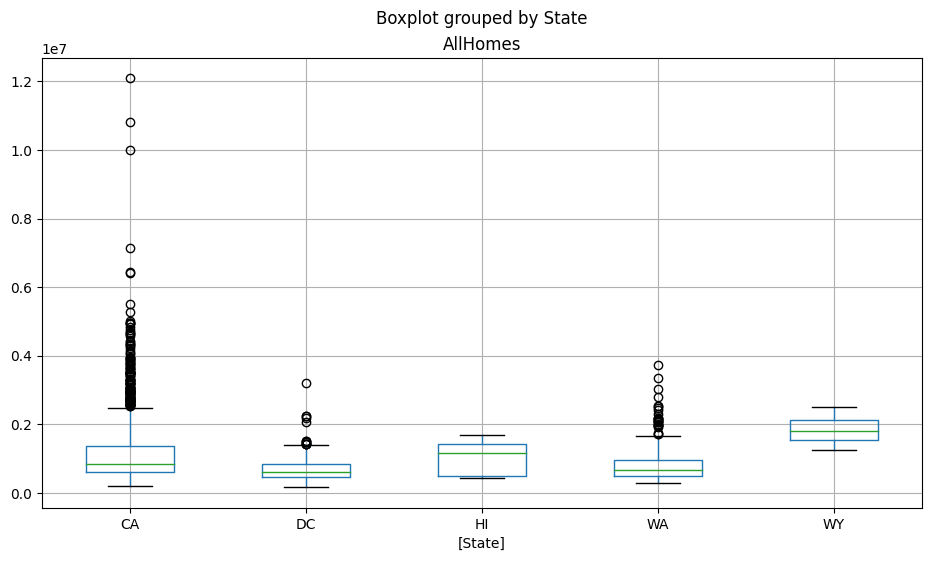

In [62]:
LastPriceDF.loc[Top5States.index].boxplot(by='State',figsize=(11,6),grid=True)

In [11]:
LastPriceDF.groupby(level='State').describe().sort_values(by=('AllHomes','mean'),ascending=False).head().applymap(nz)

AllHomes                                                              
         count     mean      std      min      25%      50%      75%     max
State                                                                       
WY           4    1.84M  504.91K    1.25M    1.56M    1.83M    2.11M   2.43M
CA       2.21K    1.13M   885.9K  194.28K  603.22K  842.78K    1.37M  12.18M
HI           5    1.04M   566.6K  422.15K     491K    1.15M    1.44M    1.7M
WA         562  808.18K  457.42K  274.38K  497.55K  681.17K  956.32K   3.68M
DC         120  767.52K  479.59K  154.96K  454.25K  619.42K  839.19K   3.25M

<AxesSubplot: title={'center': 'US ZHVI @ November 2022'}, ylabel='Metro'>

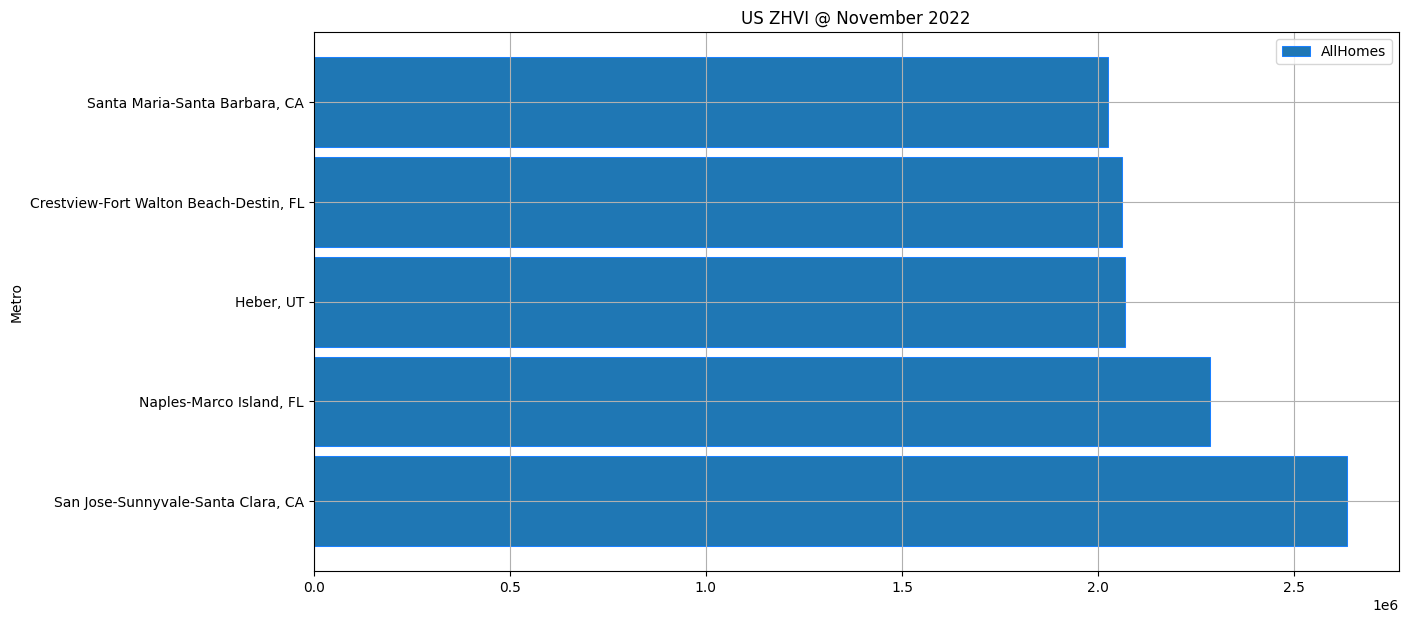

In [8]:
Top5Cities = LastPriceDF.groupby(level='Metro').mean().sort_values(by=['AllHomes'],ascending=False).head(5)
Top5Cities.plot.barh(title='US ZHVI @ November 2022', grid=True, figsize=(14,7), width=0.9, linewidth=0.75, edgecolor=(0.1,0.5,1,1))

In [12]:
LastPriceDF.groupby(level='Metro').describe().sort_values(by=('AllHomes','mean'),ascending=False).head(10).applymap(nz)

AllHomes                           \
                                          count   mean      std      min   
Metro                                                                      
San Jose-Sunnyvale-Santa Clara, CA          100  2.63M    1.08M  909.68K   
Naples-Marco Island, FL                      23  2.29M    3.65M   344.5K   
Heber, UT                                    10  2.07M    1.36M  616.87K   
Crestview-Fort Walton Beach-Destin, FL        8  2.06M    2.14M  312.17K   
Santa Maria-Santa Barbara, CA                28  2.02M  934.76K    1.12M   
Jackson, WY-ID                                4  1.84M  504.91K    1.25M   
Key West, FL                                 11  1.52M  477.95K   875.5K   
Bremerton-Silverdale-Port Orchard, WA         9  1.51M  321.93K    1.04M   
San Francisco-Oakland-Berkeley, CA          493  1.48M  723.68K  456.45K   
Los Angeles-Long Beach-Anaheim, CA          506  1.32M    1.13M  328.44K   

                                                                         
                                            25%      50%    75%     max  
Metro                                                                    
San Jose-Sunnyvale-Santa Clara, CA        1.68M    2.64M  3.37M   5.05M  
Naples-Marco Island, FL                 689.06K    1.04M  1.68M  16.55M  
Heber, UT                                878.5K    1.94M  2.64M   4.79M  
Crestview-Fort Walton Beach-Destin, FL  327.58K  892.86K  4.03M   5.38M  
Santa Maria-Santa Barbara, CA             1.35M    1.83M  2.25M   5.13M  
Jackson, WY-ID                            1.56M    1.83M  2.11M   2.43M  
Key West, FL                              1.23M    1.42M   1.8M   2.48M  
Bremerton-Silverdale-Port Orchard, WA     1.25M    1.58M  1.68M    2.1M  
San Francisco-Oakland-Berkeley, CA       930.3K    1.34M  1.83M   4.99M  
Los Angeles-Long Beach-Anaheim, CA      779.52K    1.04M  1.46M  12.18M

<AxesSubplot: title={'center': 'AllHomes'}, xlabel='[Metro]'>

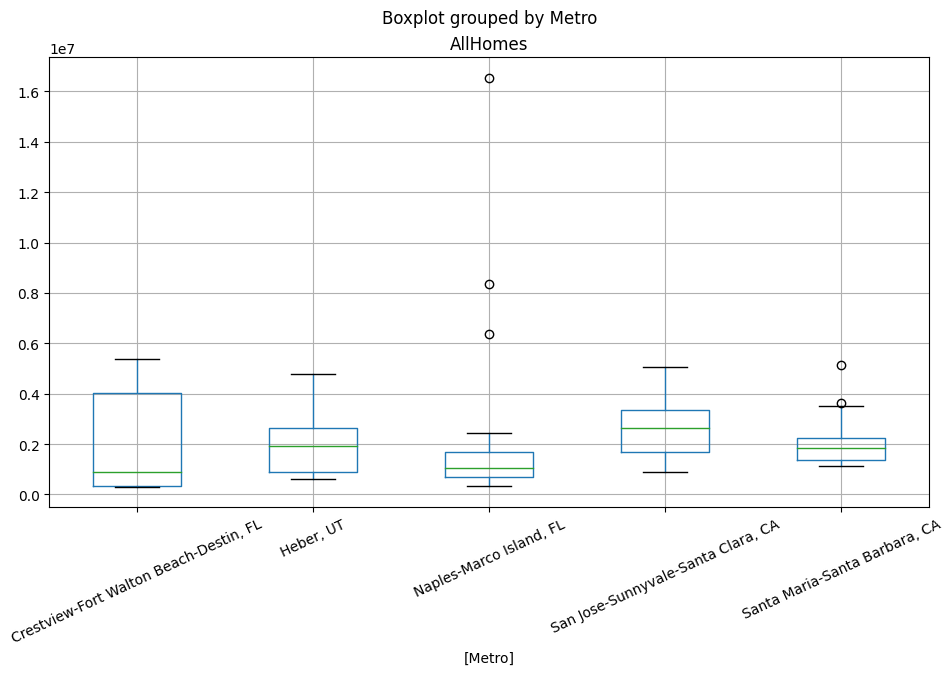

In [9]:
LastPriceDF[LastPriceDF.index.get_level_values(1).isin(Top5Cities.index)].boxplot(by='Metro',figsize=(11,6),rot=25)

<AxesSubplot: title={'center': 'AllHomes'}, xlabel='[City]'>

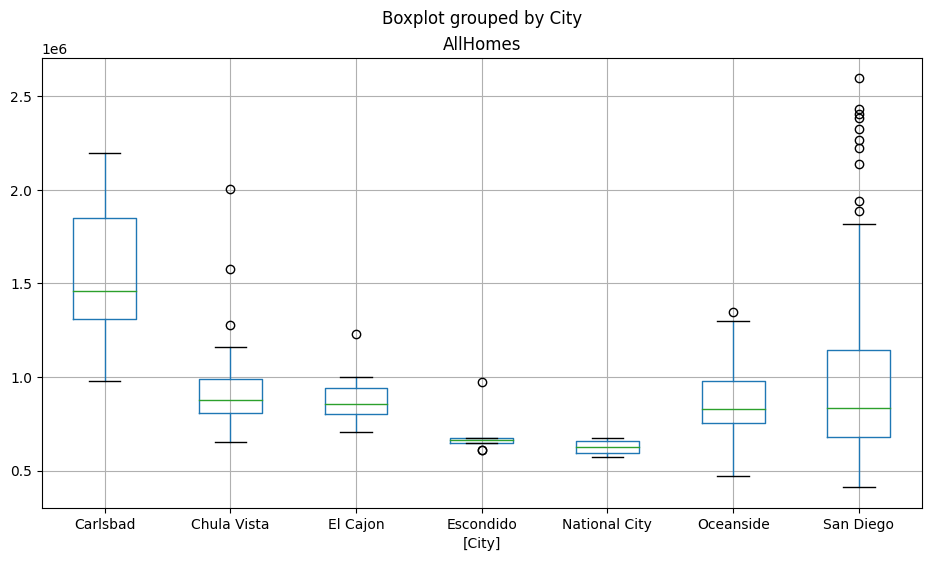

In [33]:
# LastPriceDF[LastPriceDF.index.get_level_values(2) == 'San Diego County'].groupby(level='City').describe()
LastPriceDF[LastPriceDF.index.get_level_values(2) == 'San Diego County'].boxplot(by='City',figsize=(11,6))

In [10]:
LastPriceDF[LastPriceDF.index.get_level_values(3) == 'San Diego'].sort_values(by=('AllHomes'),ascending=False).head(12).applymap(nz)

AllHomes
State Metro                              CountyName       City      RegionName                      
CA    San Diego-Chula Vista-Carlsbad, CA San Diego County San Diego North City                  2.6M
                                                                    La Jolla                   2.43M
                                                                    Sunset Cliffs              2.41M
                                                                    Rancho Encantado           2.38M
                                                                    Del Mar Heights            2.32M
                                                                    Horton Plaza               2.27M
                                                                    Wooded Area                2.22M
                                                                    La Playa                   2.14M
                                                                    Black Mountain Ranch       1.94M
                                                                    Roseville - Fleet Ridge    1.89M
                                                                    Carmel Valley              1.82M
                                                                    Torrey Highlands            1.8M

## Time series analysis

In [53]:
set(zhvi_timeseries.columns.get_level_values(2).values)

{'Ada County',
 'Adams County',
 'Aiken County',
 'Alachua County',
 'Alameda County',
 'Albany County',
 'Alexandria City',
 'Allegany County',
 'Allegheny County',
 'Allen County',
 'Anchorage Borough',
 'Anne Arundel County',
 'Arapahoe County',
 'Archer County',
 'Arlington County',
 'Auglaize County',
 'Avery County',
 'Baltimore City',
 'Baltimore County',
 'Barnstable County',
 'Barry County',
 'Bay County',
 'Beaufort County',
 'Bell County',
 'Bennington County',
 'Benton County',
 'Berkeley County',
 'Berkshire County',
 'Bernalillo County',
 'Berrien County',
 'Bexar County',
 'Black Hawk County',
 'Blair County',
 'Boone County',
 'Boulder County',
 'Bowie County',
 'Brazoria County',
 'Brazos County',
 'Brevard County',
 'Bristol County',
 'Bronx County',
 'Broomfield County',
 'Broward County',
 'Brown County',
 'Bucks County',
 'Burlington County',
 'Butler County',
 'Butte County',
 'Cabarrus County',
 'Cache County',
 'Caddo Parish',
 'Caldwell County',
 'Calhoun Count

In [54]:
zhvi_timeseries.groupby(level='State', axis=1).mean()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2000-01-31,158116.074074,103724.841584,108912.453333,146163.769697,3.059841e+05,201230.026030,124802.816092,237384.827586,155086.921348,136276.333816,...,NaN,140945.097324,140031.264585,176026.571429,162861.981579,111322.0,231113.051685,123327.931298,88369.166667,NaN
2000-02-29,161298.857143,103891.359223,108954.600000,147371.029940,3.072038e+05,203693.737069,124229.033333,236258.640449,155410.831461,136584.671954,...,NaN,141728.790476,141315.577796,175361.863636,160675.583541,111334.0,232247.431461,123618.769517,88480.083333,NaN
2000-03-31,162817.137931,104151.631068,109286.426667,147844.658683,3.095027e+05,204831.741379,124758.122222,237601.134831,155806.752809,137166.403028,...,NaN,141879.532067,141768.577670,175700.863636,160931.111663,111911.0,233206.269663,123365.768382,88703.916667,NaN
2000-04-30,162722.413793,104565.533981,109975.613333,148712.668663,3.144280e+05,207201.540948,125782.722222,240418.202247,156913.611111,138223.084294,...,NaN,142460.166271,141874.489499,176374.318182,162061.548387,112615.2,234978.386517,123702.636029,89031.916667,NaN
2000-05-31,163007.793103,105177.194175,110490.786667,149614.608782,3.200738e+05,209695.338362,126531.033333,242972.887640,157666.755556,139307.538905,...,NaN,142802.248815,141980.275584,184992.115789,163087.600496,113347.0,235817.771619,124484.245421,89040.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,431357.300000,211990.283069,267048.568182,540158.519179,1.158163e+06,681097.563665,354279.012821,765982.658333,356763.450704,596534.964286,...,267881.750000,455897.076135,399097.465644,671824.736000,440609.972973,300646.3,814964.096601,266207.510158,154327.333333,1770614.00
2022-09-30,436444.750000,212944.839050,268704.920455,530726.899197,1.147530e+06,678047.103876,355709.570513,764934.966667,358382.640845,599476.364583,...,270850.142857,454644.059767,397249.210543,669564.848000,440616.233035,303990.5,811540.309481,266780.471783,155680.866667,1782038.00
2022-10-31,437379.825000,213503.492105,270211.068182,527006.264184,1.138107e+06,680120.218798,356489.942308,764713.850000,361859.979021,603956.868306,...,273125.928571,452943.107246,397441.123685,664998.904000,441182.299616,306525.5,807776.372093,268170.266366,157375.733333,1816324.25
2022-11-30,440702.125000,214132.026316,270768.662921,521683.968198,1.132790e+06,678091.582822,357115.865385,758907.508333,364154.743056,606642.567067,...,274797.678571,450080.817529,396488.262890,664006.384000,442013.994904,311423.3,808751.502683,269791.984234,158466.266667,1843588.00


In [55]:
zhvi_timeseries.sort_values(by=zhvi_timeseries.index[-1],axis=1,ascending=False).iloc[-5:,:5].applymap(nz)

State                           FL                                 CA  \
Metro      Naples-Marco Island, FL Los Angeles-Long Beach-Anaheim, CA   
CountyName          Collier County                 Los Angeles County   
City                        Naples                      Beverly Hills   
RegionName              Port Royal              Beverly Hills Gateway   
2022-08-31                  16.45M                             12.53M   
2022-09-30                  16.46M                             12.37M   
2022-10-31                  16.43M                              12.2M   
2022-11-30                  16.42M                             12.07M   
2022-12-31                  16.44M                             11.99M   

State                                                                       FL  
Metro                                  Miami-Fort Lauderdale-Pompano Beach, FL  
CountyName                                                   Palm Beach County  
City                                                                   Jupiter  
RegionName Trousdale Estates The Flats                             Bear's Club  
2022-08-31            10.86M     10.3M                                    8.7M  
2022-09-30            10.88M    10.19M                                   8.87M  
2022-10-31             10.8M    10.02M                                      9M  
2022-11-30            10.64M     9.94M                                   9.09M  
2022-12-31            10.49M      9.9M                                   9.08M

<AxesSubplot: >

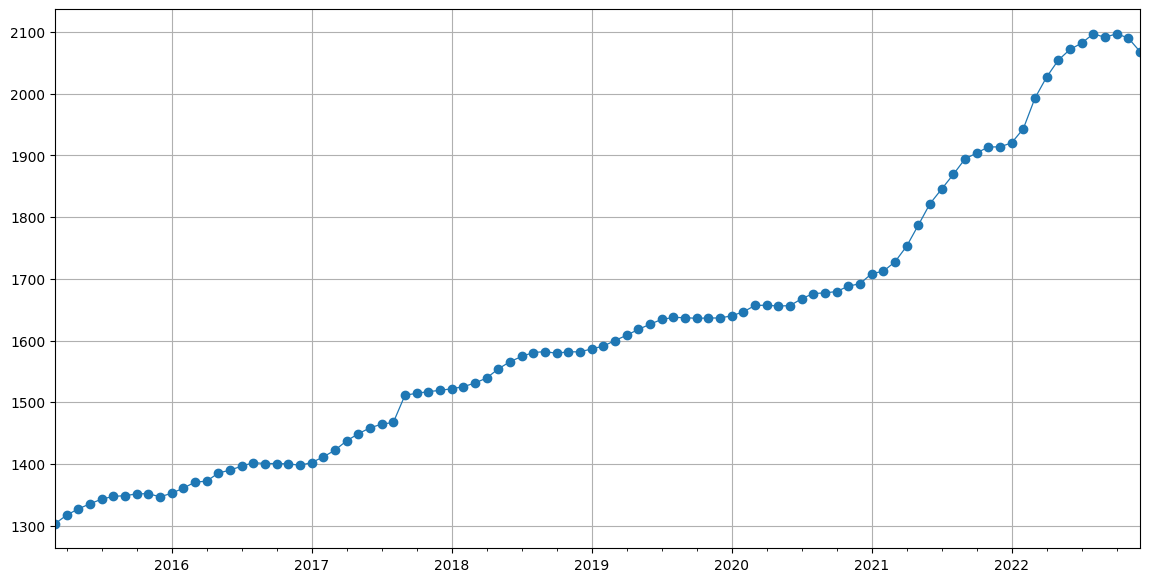

In [20]:
zori_timeseries.mean(axis=1).plot(grid = True,
        style = "-o",
        figsize = (14,7),
        linewidth = 0.9)

In [56]:
zori_timeseries.groupby(level='State', axis=1).mean().reset_index()

State,index,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2015-03-31,1282.655008,849.635526,843.677990,962.022175,1808.362135,1333.529563,1601.709576,2017.205283,1181.031921,...,NaN,1111.873974,1197.565881,911.043332,1456.294904,NaN,1206.762307,1028.795240,NaN,907.359841
1,2015-04-30,1282.359102,855.687234,858.973490,970.140312,1829.398439,1320.734027,1606.086863,2031.870465,1196.690415,...,NaN,1115.042837,1199.163621,914.624466,1465.184248,NaN,1277.479133,1034.477977,NaN,915.799166
2,2015-05-31,1291.373577,860.899645,879.696588,977.134629,1856.600036,1330.002370,1625.042754,2046.328539,1200.602528,...,NaN,1121.375063,1207.926373,921.627709,1473.539203,NaN,1254.090208,1040.174467,NaN,934.919883
3,2015-06-30,1297.021842,867.886005,886.830038,989.484192,1876.344378,1348.353449,1639.083121,2072.145240,1203.305114,...,NaN,1127.490043,1214.950950,925.642695,1478.429582,NaN,1269.411823,1045.739786,NaN,937.152380
4,2015-07-31,1298.891482,870.195762,888.017474,996.496937,1883.469563,1361.723412,1654.668272,2077.172793,1198.672981,...,NaN,1132.257984,1216.854105,930.519486,1480.251385,NaN,1284.035281,1044.030357,NaN,940.375704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2022-08-31,1578.205317,1431.087021,1225.780314,1949.016536,2900.364105,2029.171559,1961.838404,2459.678920,1775.365888,...,1274.725760,1745.096387,1721.216117,1757.862636,1904.807235,2118.753890,2116.346227,1204.041071,1167.246528,1177.387839
90,2022-09-30,1584.951039,1445.542090,1236.101188,1953.651374,2902.022356,2026.022112,1976.764074,2471.176837,1768.407631,...,1275.394742,1755.928939,1729.614950,1757.736509,1930.700840,2086.887125,2108.807742,1208.229344,1169.302617,1176.613363
91,2022-10-31,1584.911670,1444.683603,1275.853625,1921.511675,2945.090725,2574.681890,1959.861001,2467.121893,1744.016701,...,1249.740118,1732.930139,1727.243305,1755.301270,1914.102505,2099.870400,2093.924238,1216.797197,1090.199287,1165.006974
92,2022-11-30,1579.232137,1458.650719,1282.270820,1931.590419,2949.736608,2566.402336,1922.463626,2450.675349,1742.786651,...,1240.617678,1729.414279,1717.074695,1755.372489,1916.955249,2058.661143,2072.770150,1211.450541,1034.094821,1167.142976


In [10]:
zhvi_timeseries_pct = zhvi_timeseries.pct_change()

In [16]:
zhvi_timeseries_pct_yoy = zhvi_timeseries.pct_change(12)*100

In [17]:
zhvi_timeseries_pct_yoy.tail()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2022-08-31,15.579277,19.892971,22.099004,7.869195,8.829585,8.169705,22.921127,7.424556,23.227195,9.867256,...,15.130075,NaN,25.217409,24.958398,NaN,NaN,30.045354,39.678760,17.430537,15.976289
2022-09-30,11.404935,15.943538,18.110686,6.946850,5.680420,7.311865,19.033645,5.519444,19.282173,8.261676,...,11.250151,NaN,21.772695,23.364186,NaN,NaN,27.681671,34.906288,17.370273,15.901752
2022-10-31,7.537357,13.246391,14.146629,6.247221,3.510569,6.780948,14.970803,4.611340,15.226050,7.557096,...,8.810831,NaN,18.199886,21.592961,NaN,NaN,25.115497,30.664013,17.313482,15.570236
2022-11-30,4.707317,11.690110,10.204928,5.695963,2.759415,6.471537,10.939339,4.408885,11.254164,7.039508,...,6.077923,NaN,16.525226,19.791295,NaN,NaN,19.078237,26.105740,16.821927,14.308474
2022-12-31,2.655712,10.797578,7.522403,5.232494,1.773552,6.191963,8.073736,3.911370,8.588056,7.012690,...,2.845851,NaN,13.782615,17.630772,NaN,NaN,14.435882,22.339521,15.866269,7.227208


In [23]:
# Annualize the monhtly returns
100*((1+zhvi_timeseries_pct).pow(12)-1).tail()

State,AZ,TX,NV,NY,CA,NY,NV,CA,NV,NY,...,TX,MO,GA,TX,NV,AZ,TN,FL,IL,CA
Metro,"Phoenix-Mesa-Chandler, AZ","Dallas-Fort Worth-Arlington, TX","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA","Los Angeles-Long Beach-Anaheim, CA","New York-Newark-Jersey City, NY-NJ-PA","Las Vegas-Henderson-Paradise, NV","Los Angeles-Long Beach-Anaheim, CA","Las Vegas-Henderson-Paradise, NV","New York-Newark-Jersey City, NY-NJ-PA",...,"Austin-Round Rock-Georgetown, TX","Columbia, MO","Atlanta-Sandy Springs-Alpharetta, GA","Killeen-Temple, TX","Las Vegas-Henderson-Paradise, NV","Lake Havasu City-Kingman, AZ","Nashville-Davidson--Murfreesboro--Franklin, TN","Orlando-Kissimmee-Sanford, FL","Chicago-Naperville-Elgin, IL-IN-WI",NaN
CountyName,Maricopa County,Dallas County,Clark County,New York County,Los Angeles County,New York County,Clark County,Los Angeles County,Clark County,Kings County,...,Hays County,Boone County,Forsyth County,Bell County,Clark County,Mohave County,Davidson County,Osceola County,Will County,Plumas County
City,Phoenix,Dallas,Las Vegas,New York,Los Angeles,New York,Las Vegas,Los Angeles,Las Vegas,New York,...,San Marcos,Columbia,Cumming,Killeen,North Las Vegas,Willow Beach,Nashville,Kissimmee,Naperville,Westwood
RegionName,Maryvale,Northeast Dallas,Paradise,Upper East Side,South Los Angeles,Upper West Side,Spring Valley,Southeast Los Angeles,Sunrise Manor,Bedford-Stuyvesant,...,Castle Forest,Heritage Estates,Whisper Point,Splawn Ranch,Rome,White Hills,Villages of Long Hunter,The Oaks,Ashwood Crossing,Hamilton Branch
2022-08-31,-22.395751,4.133009,-7.072617,0.691678,-16.240658,2.983003,-6.418451,-12.179380,-5.666713,6.991337,...,-19.217579,NaN,1.211242,10.912649,1.009400,NaN,12.966181,12.750112,14.523300,21.259274
2022-09-30,-25.320588,-12.340408,-14.264220,0.267237,-15.123258,0.777825,-13.686001,-10.772103,-13.029592,3.105727,...,-8.376825,-0.746266,0.105469,10.546320,-13.942989,NaN,-0.833126,-1.697350,14.218751,21.996597
2022-10-31,-20.047934,-6.959948,-17.486071,-0.713455,-18.546525,0.076200,-18.060766,-6.956732,-17.298044,1.006623,...,-5.002630,1.690740,-5.232116,8.257615,-21.187684,NaN,4.286947,-5.801398,12.255819,11.488716
2022-11-30,-13.593801,-6.446272,-17.550292,-1.262197,-5.339801,-3.335402,-17.701983,3.121435,-16.695345,-0.754871,...,-3.975505,-0.263558,4.021897,4.749843,-24.241680,NaN,-22.561042,-7.658801,4.556051,0.000000
2022-12-31,0.397584,-1.739760,-9.454661,-2.426144,-5.720256,-3.147335,-10.388100,1.081658,-8.138307,-0.426146,...,-11.667623,1.633677,-2.195811,1.328411,-16.837044,NaN,-11.370784,-6.193249,3.141518,-44.199881


Function for plotting accumulated returns (total change) in time series

In [59]:
zhvi_timeseries_pct = zhvi_timeseries.pct_change()
zori_timeseries_pct = zori_timeseries.pct_change()

In [60]:
zhvi_timeseries_pct_yoy = zhvi_timeseries.pct_change(12)
zori_timeseries_pct_yoy = zori_timeseries.pct_change(12)

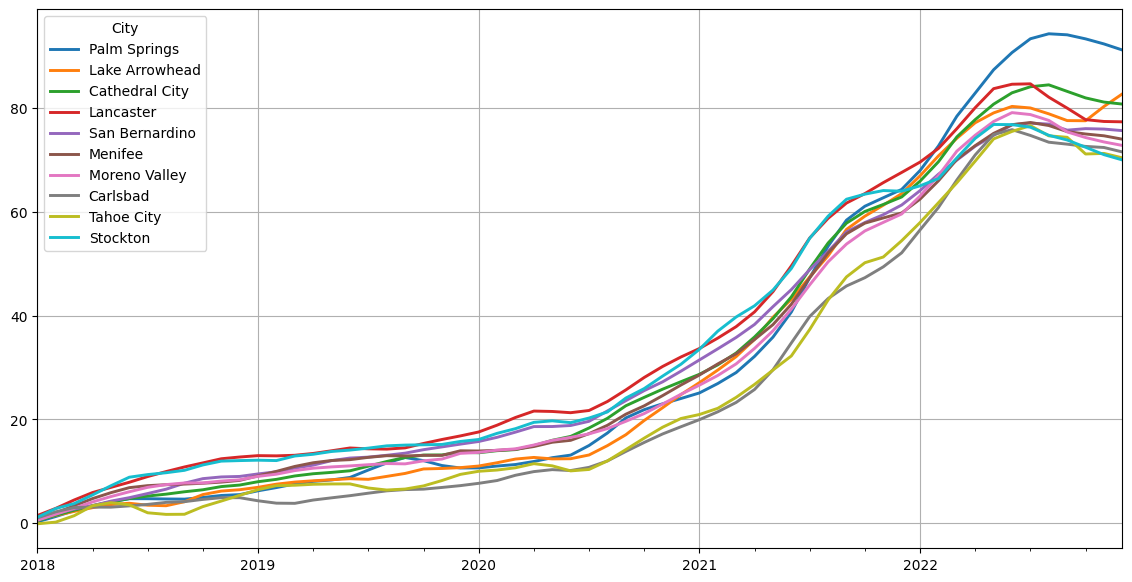

In [70]:
# Plot accumulated returns
def plot_top_accum(pct_returns, time_years, regions_count):
    (np.expm1(np.log1p(pct_returns.iloc[-time_years*12:]).cumsum())*100).sort_values(by=pct_returns.index[-1],axis=1,ascending=False).iloc[:,:regions_count].plot(
        grid = True,
        # style = "-o",
        figsize = (14,7),
        linewidth = 2.1
    )

plot_top_accum(zhvi_timeseries_pct[['CA']].groupby(level='City',axis=1).mean(), time_years = 5, regions_count = 10)

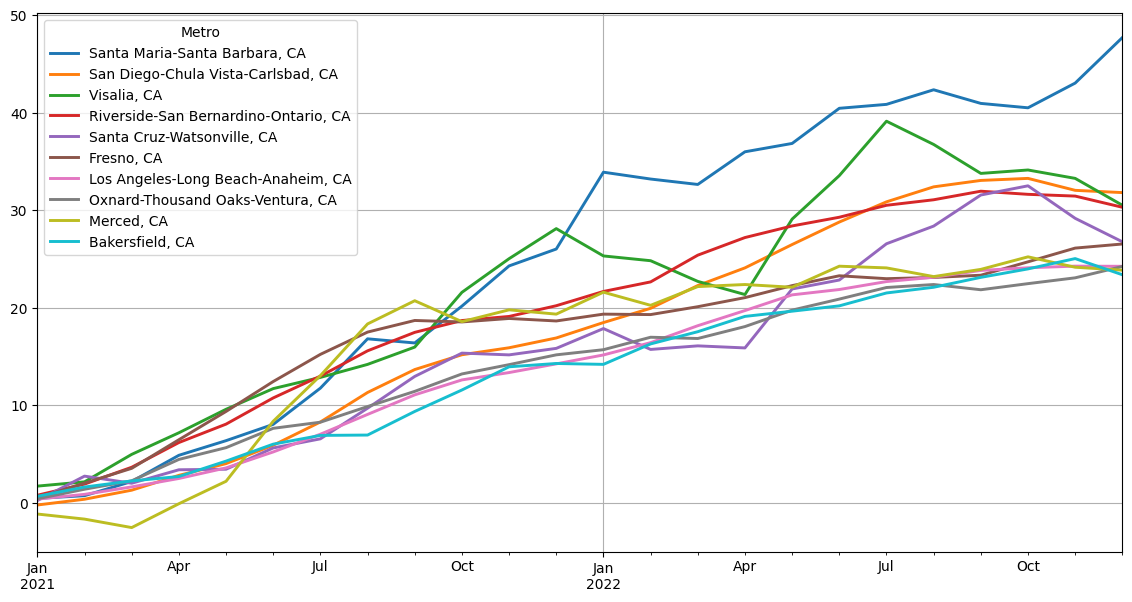

In [96]:
plot_top_accum(zori_timeseries_pct[['CA']].groupby(level='Metro',axis=1).mean(), 2, 10)

In [106]:
n = 3
pct_returns = zori_timeseries_pct.tail(12*n).dropna(axis=1)
zori_timeseries_pct_accum = np.expm1(np.log1p(pct_returns.iloc[-n*12:]).cumsum()).sort_values(by=pct_returns.index[-1],axis=1,ascending=False)

In [110]:
# Find maxiumum accumulated returns for each city, and the date when that happened
zori_timeseries_pct_accum_top = zori_timeseries_pct_accum == zori_timeseries_pct_accum.max()

In [113]:
zori_timeseries_pct_accum_top

State                             AZ                                   CA  \
CountyName              Pinal County                San Bernardino County   
Metro      Phoenix-Mesa-Chandler, AZ Riverside-San Bernardino-Ontario, CA   
RegionName               Casa Grande                         Apple Valley   
2020-01-31                     False                                False   
2020-02-29                     False                                False   
2020-03-31                     False                                False   
2020-04-30                     False                                False   
2020-05-31                     False                                False   
2020-06-30                     False                                False   
2020-07-31                     False                                False   
2020-08-31                     False                                False   
2020-09-30                     False                                False   
2020-10-31                     False                                False   
2020-11-30                     False                                False   
2020-12-31                     False                                False   
2021-01-31                     False                                False   
2021-02-28                     False                                False   
2021-03-31                     False                                False   
2021-04-30                     False                                False   
2021-05-31                     False                                False   
2021-06-30                     False                                False   
2021-07-31                     False                                False   
2021-08-31                     False                                False   
2021-09-30                     False                                False   
2021-10-31                     False                                False   
2021-11-30                     False                                False   
2021-12-31                     False                                False   
2022-01-31                     False                                False   
2022-02-28                     False                                False   
2022-03-31                     False                                False   
2022-04-30                     False                                False   
2022-05-31                     False                                False   
2022-06-30                     False                                False   
2022-07-31                     False                                False   
2022-08-31                     False                                False   
2022-09-30                     False                                False   
2022-10-31                     False                                False   
2022-11-30                     False                                False   
2022-12-31                      True                                 True   

State                             FL                                          \
CountyName                Lee County                       Miami-Dade County   
Metro      Cape Coral-Fort Myers, FL Miami-Fort Lauderdale-Pompano Beach, FL   
RegionName                    Estero                       Sunny Isles Beach   
2020-01-31                     False                                   False   
2020-02-29                     False                                   False   
2020-03-31                     False                                   False   
2020-04-30                     False                                   False   
2020-05-31                     False                                   False   
2020-06-30                     False                                   False   
2020-07-31                     False                                   False   
2020-08-31                     False   

<AxesSubplot: title={'center': '3-Year Change in Home Prices by State @ December 2022'}, xlabel='ZHVI - $(USD)'>

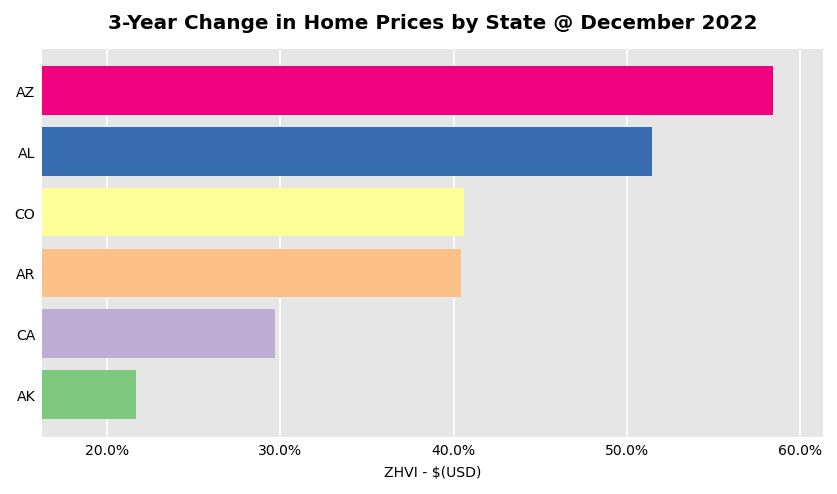

In [110]:
top6statesbypct = zhvi_timeseries.groupby(level='State',axis=1).mean().pct_change(periods=12*3).iloc[-1].head(6).sort_values(ascending=True)
barplot_by_location(top6statesbypct, axisformat = 'pct',title='3-Year Change in Home Prices by State @ December 2022')

In [69]:
zhvi_timeseries_pct.tail(12*3).groupby(level='State',axis=1).mean().describe().sort_values(by='mean',axis=1,ascending=False)

State,FL,AZ,NC,TN,MT,UT,SC,AL,ID,NH,...,MS,IL,IA,NY,LA,MN,HI,AK,ND,DC
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.014607,0.013323,0.013242,0.013083,0.012883,0.012856,0.012416,0.012372,0.012068,0.011857,...,0.007505,0.007294,0.007054,0.006714,0.005846,0.005639,0.005583,0.005105,0.004340,0.003272
std,0.008793,0.011395,0.006859,0.008296,0.008060,0.010975,0.007141,0.004761,0.016839,0.006312,...,0.006706,0.004606,0.003215,0.003722,0.003790,0.004125,0.007124,0.011654,0.004404,0.005804
min,0.002356,-0.016507,0.002199,-0.003071,0.000289,-0.013039,0.002344,0.002898,-0.016873,0.002257,...,-0.006851,-0.000892,0.001421,0.001375,-0.001362,-0.003256,-0.006629,-0.019162,-0.003008,-0.009035
25%,0.006419,0.008444,0.006516,0.006858,0.006563,0.007246,0.005360,0.008931,-0.002026,0.007343,...,0.002728,0.002127,0.004306,0.003007,0.003735,0.003237,0.000090,-0.001144,0.000784,-0.000099
50%,0.013143,0.015349,0.013445,0.012286,0.011984,0.014328,0.011824,0.012169,0.009251,0.011237,...,0.008306,0.008600,0.007894,0.006697,0.005929,0.006203,0.005946,0.002458,0.003459,0.004518
75%,0.022837,0.019594,0.019158,0.021310,0.018592,0.019158,0.018399,0.016559,0.026865,0.016409,...,0.013582,0.010498,0.009732,0.009142,0.008161,0.008240,0.010256,0.011048,0.008082,0.008274
max,0.030126,0.032951,0.024834,0.025539,0.028828,0.036684,0.025814,0.020872,0.041027,0.026052,...,0.017038,0.013824,0.012348,0.014067,0.013780,0.014508,0.019828,0.031594,0.013307,0.011651


In [70]:
zhvi_timeseries_pct.tail(12*3).describe().drop('count').groupby(level='Metro',axis=1).mean().T.sort_values(by='mean',ascending=False)*100

,mean,std,min,25%,50%,75%,max
Metro,,,,,,,
"Naples-Marco Island, FL",1.905147,1.645334,-0.473972,0.548571,1.344802,3.389931,5.362751
"Heber, UT",1.705769,1.693480,-1.861450,0.526932,1.499893,3.034436,5.186380
"Boone, NC",1.675933,1.221238,-0.364097,0.519936,1.887182,2.754946,3.457802
"Homosassa Springs, FL",1.643763,0.818503,0.115014,0.999861,1.695932,2.294321,3.125251
"Cape Coral-Fort Myers, FL",1.630392,1.512107,-0.591589,0.451135,1.100683,2.968418,4.597061
...,...,...,...,...,...,...,...
"Shreveport-Bossier City, LA",0.291070,1.394875,-2.717207,-0.645980,0.411485,1.178616,2.964604
"Midland, TX",0.199469,0.759865,-1.492765,-0.288111,0.274501,0.695587,1.658185
"Odessa, TX",0.103643,0.971732,-2.029904,-0.462514,0.076770,0.587246,2.536912


In [54]:
zhvi_timeseries_pct_yoy.iloc[-1].loc[('CA')].sort_values(ascending=False).head(10)

Metro                                 CountyName            City              RegionName             
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Gene Autry                 25.527188
                                                                              Sunrise Vista Chino        25.356200
                                                                              Ranch Club                 24.597202
Santa Maria-Santa Barbara, CA         Santa Barbara County  Santa Barbara     Bel Air                    24.237438
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Demuth Park                22.691650
                                                                              Desert Highland/Gateway    22.601248
Santa Maria-Santa Barbara, CA         Santa Barbara County  Santa Barbara     Cielito                    22.370367
Riverside-San Bernardino-Ontario, CA  Riverside County      Palm Springs      Desert Park Est

In [71]:
import plotly.express as px
def plot_historic_trend(timeseries, title, xaxis_title, yaxis_title, color, width=800, height=600):
    timeseries_plot = px.line(timeseries.reset_index(),
                                 x='timestamp',
                                 y=['accum_pnl_pct','accum_benchmark_pnl_pct'],
                                 hover_data=timeseries[['daily_pnl_pct_z', 'daily_pnl_pct']]
    )
    timeseries_plot.update_layout(legend=dict(
        yanchor="bottom",
        y=0.01,
        xanchor="left",
        x=0.01
    ))
    return timeseries_plot
    # st.plotly_chart(returns_timeseries, use_container_width=False, sharing="streamlit")

In [66]:
top5_metro = zhvi_timeseries_pct_yoy.groupby(level='Metro', axis=1).mean().sort_values(by='2022-12-31', axis=1 ,ascending=False).iloc[:,:5].tail()

In [85]:
metro_labels = top5_metro.columns.get_level_values('Metro')

Index(['Naples-Marco Island, FL', 'Barre, VT', 'Heber, UT',
       'Miami-Fort Lauderdale-Pompano Beach, FL', 'Key West, FL'],
      dtype='object', name='Metro')

In [96]:
# Calculate the year over year returns for the top 5 metros and store them in a dataframe
top5_metro = zhvi_timeseries_pct_yoy.groupby(level='Metro', axis=1).mean().sort_values(by='2022-12-31', axis=1 ,ascending=False).iloc[:,:5].tail()
# Extract the labels for the top 5 metros
metro_labels = top5_metro.columns.get_level_values('Metro')
# Use the last date in the dataframe and the labels from the top 5 metros to describe the dataframe
zhvi_timeseries.iloc[-1].loc[slice(None),metro_labels].dropna().groupby(level='Metro').describe()

,count,unique,top,freq
Metro,,,,
"Barre, VT",2.0,2.0,257161.0,1.0
"Heber, UT",10.0,10.0,2581073.0,1.0
"Key West, FL",11.0,11.0,871729.0,1.0
"Miami-Fort Lauderdale-Pompano Beach, FL",715.0,714.0,473952.0,2.0
"Naples-Marco Island, FL",23.0,23.0,523966.0,1.0


<AxesSubplot: >

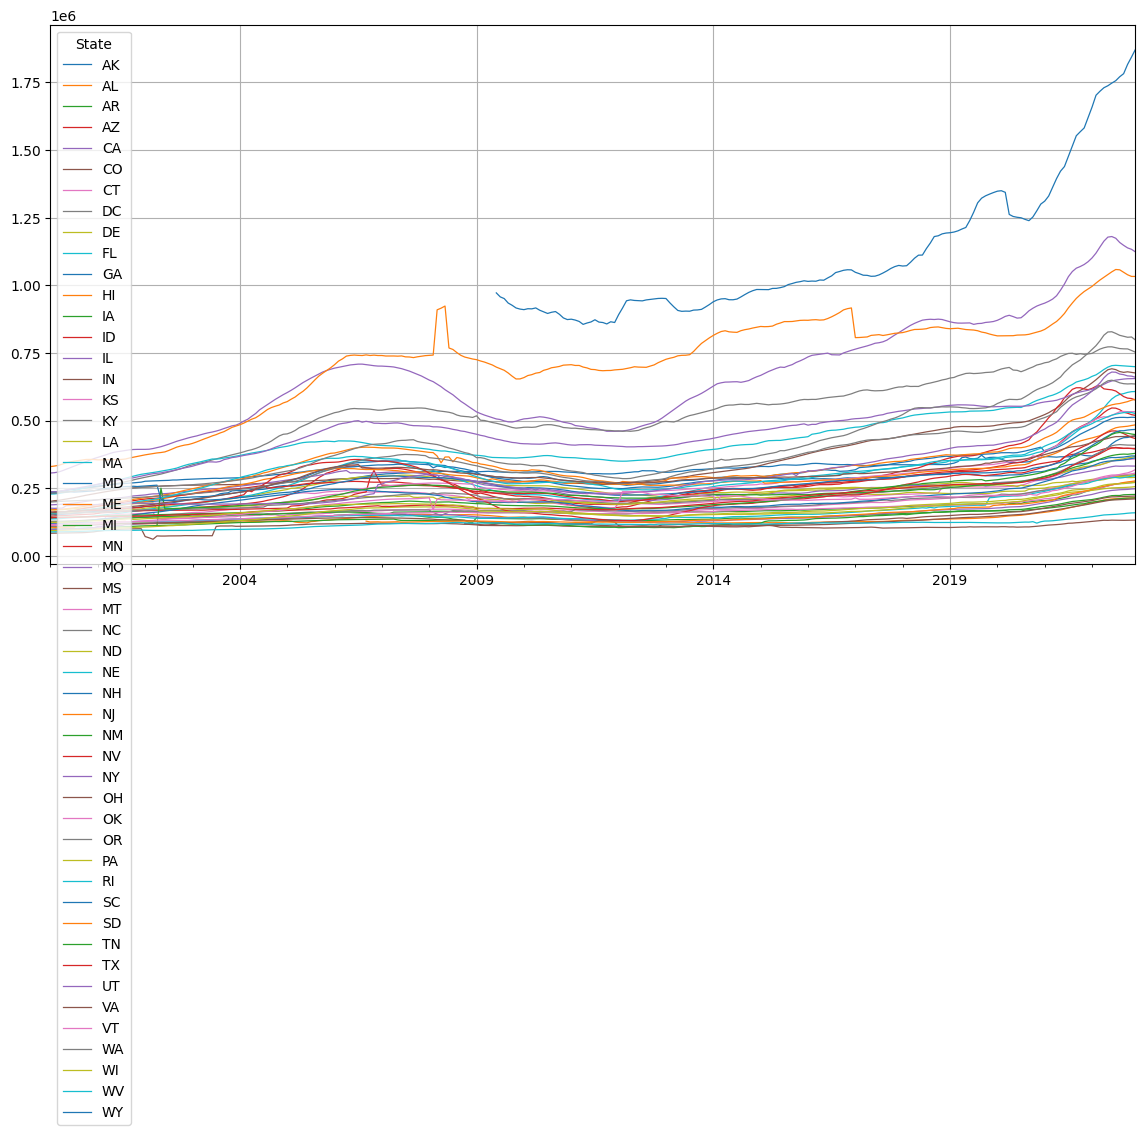

In [55]:
zhvi_timeseries_pct_yoy.groupby(level='State', axis=1).mean().plot(grid = True,
#         style = "-o",
        figsize = (14,7),
        linewidth = 0.9)

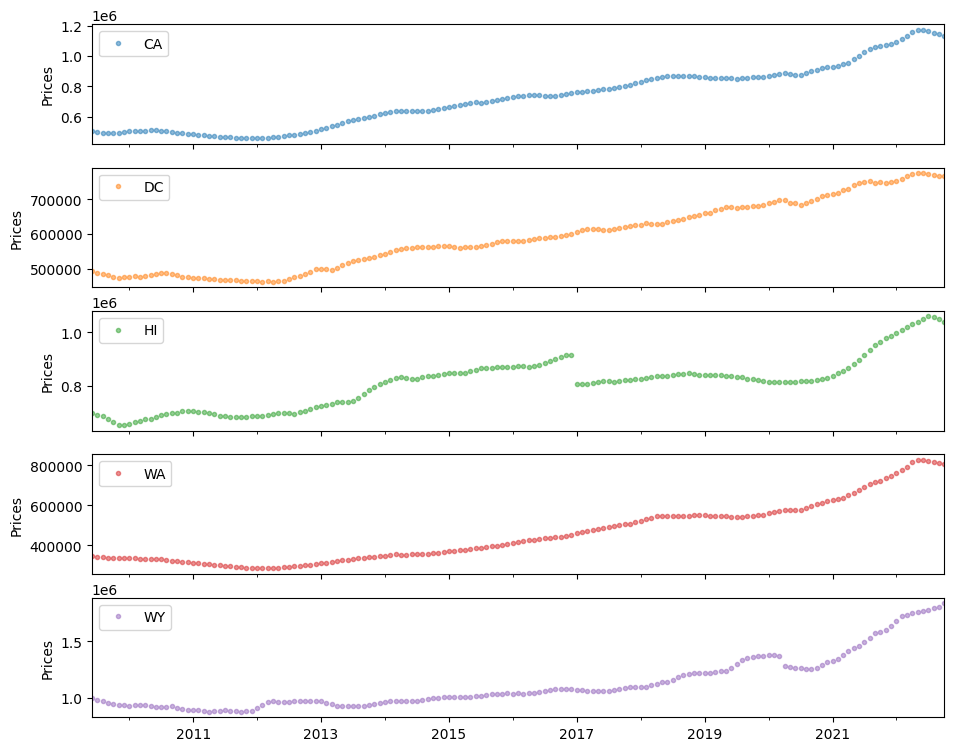

In [21]:
cols_plot = Top5States.index.values
axes = zhvi_timeseries[cols_plot].groupby(level='State',axis=1).mean().dropna().plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Prices')

In [22]:
zhvi_timeseries[cols_plot].groupby(level='State',axis=1).mean().dropna().applymap(nz)

State,CA,DC,HI,WA,WY
2009-06-30,503.46K,491.98K,697.99K,345.97K,991.51K
2009-07-31,501.31K,488.62K,692.09K,343.73K,976.46K
2009-08-31,496.32K,484.9K,686.15K,341.46K,970.13K
2009-09-30,492.9K,480.89K,676.28K,339.62K,953.35K
2009-10-31,492.11K,476.43K,664.54K,338.56K,944.85K
...,...,...,...,...,...
2022-06-30,1.17M,775.24K,1.05M,827.98K,1.77M
2022-07-31,1.17M,772K,1.06M,821.9K,1.78M
2022-08-31,1.15M,768.78K,1.06M,814.96K,1.79M
2022-09-30,1.14M,767.73K,1.05M,811.54K,1.8M


In [23]:
zhvi_timeseries.index[-1]-pd.Timedelta(52,"W")

Timestamp('2021-11-01 00:00:00')

In [9]:
zhvi_timeseries_pct = zhvi_timeseries.pct_change()
# Indexing by number of rows vs. date period
zhvi_timeseries_pct[['CA']].loc['2021':'2022']

State                                      CA                                  \
Metro      Los Angeles-Long Beach-Anaheim, CA                                   
CountyName                 Los Angeles County                                   
City                              Los Angeles                                   
RegionName                  South Los Angeles Southeast Los Angeles Hollywood   
2021-01-31                           0.003924              0.010801  0.003243   
2021-02-28                           0.008468              0.009383  0.008539   
2021-03-31                           0.013404              0.007872  0.003500   
2021-04-30                           0.013544              0.012299  0.010975   
2021-05-31                           0.018470              0.014291  0.014394   
2021-06-30                           0.018498              0.019857  0.011312   
2021-07-31                           0.025141              0.021502  0.012662   
2021-08-31                           0.018835              0.014371  0.003233   
2021-09-30                           0.015823              0.008431  0.004898   
2021-10-31                           0.003658              0.002638 -0.003977   
2021-11-30                           0.002714              0.004509 -0.003638   
2021-12-31                           0.004743              0.005689  0.000608   
2022-01-31                           0.008262              0.005446  0.001120   
2022-02-28                           0.012314              0.008821  0.007193   
2022-03-31                           0.017230              0.013209  0.014757   
2022-04-30                           0.019288              0.013345  0.015940   
2022-05-31                           0.015027              0.012904  0.015095   
2022-06-30                           0.001811              0.004104  0.000316   
2022-07-31                          -0.000789              0.003737  0.004635   
2022-08-31                          -0.014660             -0.010764 -0.011280   
2022-09-30                          -0.013571             -0.009453 -0.010745   
2022-10-31                          -0.016950             -0.005991 -0.020219   
2022-11-30                          -0.004563              0.002565 -0.008872   
2022-12-31                          -0.004897              0.000897 -0.005925   

State                                                                      \
Metro         Fresno, CA San Jose-Sunnyvale-Santa Clara, CA    Fresno, CA   
CountyName Fresno County                 Santa Clara County Fresno County   
City              Fresno                           San Jose        Fresno   
RegionName     Roosevelt                      East San Jose       Bullard   
2021-01-31      0.011408                           0.007950      0.012814   
2021-02-28      0.011279                           0.001881      0.011630   
2021-03-31      0.016116                           0.001963      0.014678   
2021-04-30      0.018522                           0.009212      0.017358   
2021-05-31      0.022992                           0.025757      0.022829   
2021-06-30      0.022996                           0.032330      0.023934   
2021-07-31      0.028948                           0.023290      0.028527   
2021-08-31      0.025539                           0.012068      0.024520   
2021-09-30      0.020299                           0.000824      0.019895   
2021-10-31      0.007514                           0.004613      0.007963   
2021-11-30      0.006391                           0.008460      0.007615   
2021-12-31      0.005637                           0.011813      0.005277   
2022-01-31      0.015279                           0.016428      0.014786   
2022-02-28      0.016010                           0.024364      0.014868   
2022-03-31      0.015599                           0.023414      0.014571   
2022-04-30      0.014533                           0.022774      0.012656   
2022-05-31      0.011405         

In [10]:
# Regions that most increased over the last month, last year
zhvi_timeseries_pct.iloc[-12*1:].sort_values(by=zhvi_timeseries.index[-1],axis=1,ascending=False).iloc[:,:5]

State,AL,MI,OH,TX,MO
Metro,"Mobile, AL","Detroit-Warren-Dearborn, MI","Dayton-Kettering, OH","San Antonio-New Braunfels, TX","St. Louis, MO-IL"
CountyName,Mobile County,Wayne County,Montgomery County,Bexar County,Saint Louis City
City,Mobile,Detroit,Dayton,San Antonio,Saint Louis
RegionName,Oakdale,Oakwood Heights,Santa Clara,Mission Ridge,Hyde Park
2022-01-31,0.050754,0.012968,0.005634,0.016480,0.037706
2022-02-28,0.036293,0.056344,0.006247,0.012600,0.014208
2022-03-31,0.034061,0.059211,0.011046,0.018068,0.018493
2022-04-30,0.012984,0.026996,0.008498,0.014863,0.042404
2022-05-31,-0.006854,0.010302,0.019242,0.011764,0.061250
2022-06-30,-0.007499,-0.005581,0.032144,0.001735,0.054725


In [11]:
zhvi_timeseries_pct[['WA']]
# zhvi_timeseries_pct['WA'].mean(axis=1).cumsum().plot(grid = True,
#         style = "-o",
#         figsize = (14,7),
#         linewidth = 0.9)
zhvi_timeseries_pct.groupby(level='Metro',axis=1).mean().cumsum()

Metro,"Abilene, TX","Akron, OH","Albany-Lebanon, OR","Albany-Schenectady-Troy, NY","Albuquerque, NM","Allentown-Bethlehem-Easton, PA-NJ","Altoona, PA","Ames, IA","Anchorage, AK","Ann Arbor, MI",...,"Whitewater, WI","Wichita Falls, TX","Wichita, KS","Wilmington, NC","Winston-Salem, NC","Worcester, MA-CT","Yakima, WA","York-Hanover, PA","Youngstown-Warren-Boardman, OH-PA","Yuma, AZ"
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,0.004220,NaN,0.004392,NaN,0.007417,-0.000531,NaN,-0.001823,0.002929,...,NaN,NaN,NaN,NaN,0.007096,0.002408,NaN,0.002730,0.002206,NaN
2000-03-31,NaN,0.005554,NaN,0.004342,NaN,0.011487,-0.001136,NaN,-0.001189,0.006415,...,NaN,NaN,NaN,NaN,0.009830,0.005814,NaN,0.004740,0.000970,NaN
2000-04-30,NaN,0.011223,NaN,0.009316,NaN,0.018239,0.000608,NaN,-0.002377,0.012926,...,NaN,NaN,NaN,NaN,0.017120,0.012971,NaN,0.009049,-0.000654,NaN
2000-05-31,NaN,0.016414,NaN,0.011844,NaN,0.019897,0.004541,NaN,-0.000219,0.021369,...,NaN,NaN,NaN,NaN,0.019933,0.021298,NaN,0.009815,-0.003735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.593760,0.309701,0.798925,0.836057,0.778636,0.897130,0.538647,0.477853,0.910315,0.798343,...,0.825107,0.630581,0.569477,0.834286,0.724305,0.902102,0.991059,0.717583,0.190828,0.902914
2022-09-30,0.599404,0.314683,0.800463,0.843361,0.780773,0.906686,0.539511,0.486704,0.922041,0.797864,...,0.828819,0.635416,0.577568,0.836897,0.731284,0.902017,0.990586,0.720115,0.196772,0.904608
2022-10-31,0.600985,0.322266,0.806070,0.850740,0.785331,0.914911,0.542118,0.492388,0.924237,0.801320,...,0.840022,0.641021,0.582608,0.843484,0.740687,0.903348,0.994700,0.722414,0.205531,0.914131
2022-11-30,0.601457,0.323636,0.807802,0.853937,0.791475,0.921883,0.546174,0.502730,0.931987,0.807042,...,0.857286,0.641011,0.588625,0.845245,0.753212,0.906853,0.995479,0.727799,0.217371,0.923923


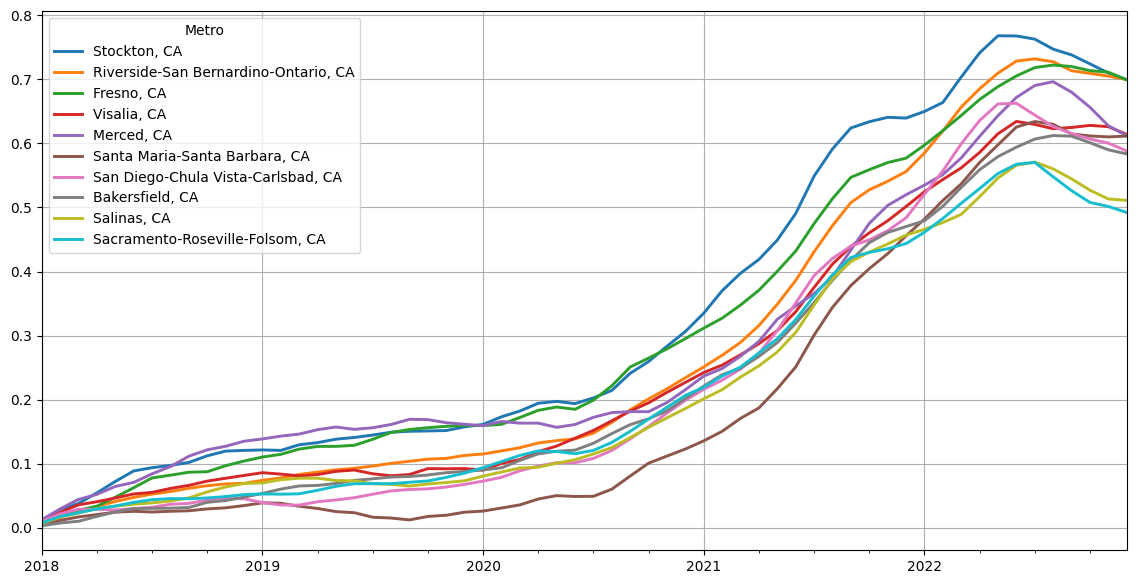

In [16]:
# Plot accumulated returns
def plot_top_accum(pct_returns, time_years, regions_count):
    np.expm1(np.log1p(pct_returns.iloc[-time_years*12:]).cumsum()).sort_values(by=pct_returns.index[-1],axis=1,ascending=False).iloc[:,:regions_count].plot(
        grid = True,
        # style = "-o",
        figsize = (14,7),
        linewidth = 2.1
    )

plot_top_accum(zhvi_timeseries_pct[['CA']].groupby(level='Metro',axis=1).mean(), 5, 10)

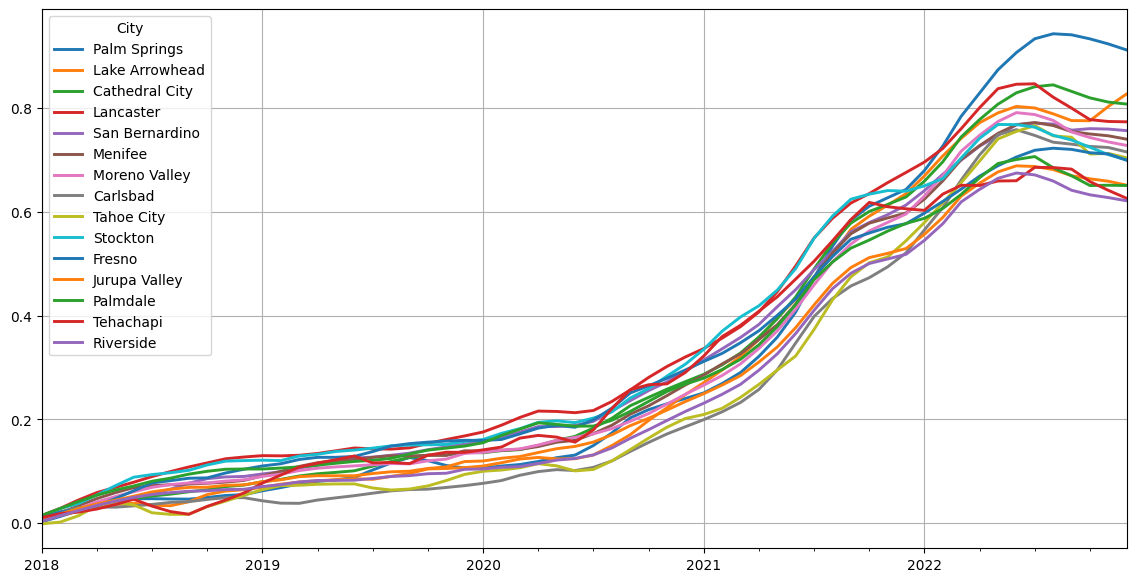

In [17]:
plot_top_accum(zhvi_timeseries_pct[['CA']].groupby(level='City',axis=1).mean(), 5, 15)

In [222]:
zhvi_timeseries_pct[Top5States.index.values]

State                  WY                                         \
Metro      Jackson, WY-ID                                          
CountyName   Teton County                                          
City              Jackson                       Wilson   Jackson   
RegionName Rafter J Ranch South Park Moose Wilson Road    Hoback   
2002-11-30            NaN        NaN               NaN       NaN   
2002-12-31            NaN        NaN               NaN       NaN   
2003-01-31            NaN        NaN               NaN       NaN   
2003-02-28            NaN        NaN               NaN       NaN   
2003-03-31            NaN        NaN               NaN       NaN   
...                   ...        ...               ...       ...   
2022-06-30       0.004266   0.006303          0.004037  0.007811   
2022-07-31       0.005772   0.005944         -0.001040  0.011106   
2022-08-31       0.005535   0.011260          0.001512  0.014286   
2022-09-30       0.007280   0.007139         -0.000698  0.013754   
2022-10-31       0.007735   0.004689          0.032679  0.034152   

State                                      CA                                  \
Metro      Los Angeles-Long Beach-Anaheim, CA                                   
CountyName                 Los Angeles County                                   
City                              Los Angeles                                   
RegionName                  South Los Angeles Southeast Los Angeles Hollywood   
2002-11-30                                NaN                   NaN       NaN   
2002-12-31                           0.012719              0.010995  0.016562   
2003-01-31                           0.009862              0.007881  0.013203   
2003-02-28                           0.008932              0.006730  0.014415   
2003-03-31                           0.011520              0.009871  0.014540   
...                                       ...                   ...       ...   
2022-06-30                           0.001812              0.004103  0.000316   
2022-07-31                          -0.000790              0.003738  0.004635   
2022-08-31                          -0.014661             -0.010765 -0.011280   
2022-09-30                          -0.013570             -0.009453 -0.010746   
2022-10-31                          -0.016948             -0.005991 -0.020219   

State                                                                      \
Metro         Fresno, CA San Jose-Sunnyvale-Santa Clara, CA    Fresno, CA   
CountyName Fresno County                 Santa Clara County Fresno County   
City              Fresno                           San Jose        Fresno   
RegionName     Roosevelt                      East San Jose       Bullard   
2002-11-30           NaN                                NaN           NaN   
2002-12-31      0.015537                           0.001694      0.017626   
2003-01-31      0.011176                           0.001931      0.013697   
2003-02-28      0.010134                           0.002208      0.011554   
2003-03-31      0.011556                           0.002000      0.012618   
...                  ...                                ...           ...   
2022-06-30      0.008335                          -0.006762      0.007053   
2022-07-31      0.006280                          -0.029112      0.004375   
2022-08-31      0.000859                          -0.032369     -0.000507   
2022-09-30     -0.001283                          -0.002976     -0.002745   
2022-10-31     -0.003791                           0.007859     -0.003506   

State       ...                         WA                             \
Metro       ... Olympia-Lacey-Tumwater, WA Spokane-Spokane Valley, WA   
CountyName  ...            Thurston County             Spokane County   
City        ...                    Olympia             Spokane Valley   
RegionName  ...            Wellington West                Green Acres   
2002-11-30  ... 

## Analysis at the State level. First itemize the subcateogries

In [10]:
ca_zhvi_timeseries_pct = zhvi_timeseries_pct['CA'].loc['2021':'2022']

In [11]:
ca_zhvi_timeseries_pct.columns = ca_zhvi_timeseries_pct.columns.remove_unused_levels()

In [12]:
zhvi_timeseries_pct.columns.levshape

(51, 301, 418, 883, 16642)

In [13]:
ca_zhvi_timeseries_pct.columns.levshape

(19, 29, 116, 2029)

In [14]:
ca_zhvi_timeseries_pct.columns.names

FrozenList(['Metro', 'CountyName', 'City', 'RegionName'])

In [15]:
# Option 1
set(ca_zhvi_timeseries_pct.columns.levels[0].values)
# Option 2
set(zhvi_timeseries_pct['CA'].columns.remove_unused_levels().levels[0].values)

{'Bakersfield, CA',
 'Chico, CA',
 'Eureka-Arcata, CA',
 'Fresno, CA',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Merced, CA',
 'Napa, CA',
 'Oxnard-Thousand Oaks-Ventura, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'Sacramento-Roseville-Folsom, CA',
 'Salinas, CA',
 'San Diego-Chula Vista-Carlsbad, CA',
 'San Francisco-Oakland-Berkeley, CA',
 'San Jose-Sunnyvale-Santa Clara, CA',
 'Santa Maria-Santa Barbara, CA',
 'Santa Rosa-Petaluma, CA',
 'Stockton, CA',
 'Vallejo, CA',
 'Visalia, CA'}

In [40]:
["Select"]+list(set(zhvi_timeseries_pct['CA'].columns.get_level_values(0).values))

['Select',
 'San Jose-Sunnyvale-Santa Clara, CA',
 nan,
 'Fresno, CA',
 'Napa, CA',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Visalia, CA',
 'Merced, CA',
 'Oxnard-Thousand Oaks-Ventura, CA',
 'Chico, CA',
 'Eureka-Arcata, CA',
 'Salinas, CA',
 'Bakersfield, CA',
 'Vallejo, CA',
 'Santa Maria-Santa Barbara, CA',
 'Sacramento-Roseville-Folsom, CA',
 'Stockton, CA',
 'San Diego-Chula Vista-Carlsbad, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'San Francisco-Oakland-Berkeley, CA',
 'Santa Rosa-Petaluma, CA']

In [126]:
SDMetro = ca_zhvi_timeseries_pct[ca_zhvi_timeseries_pct.columns.levels[0].values[2]]
SDMetro.columns = SDMetro.columns.remove_unused_levels()

In [127]:
SDMetro.columns.levshape

(1, 7, 198)

In [150]:
set(SDMetro.columns.levels[0].values)

{'San Diego County'}

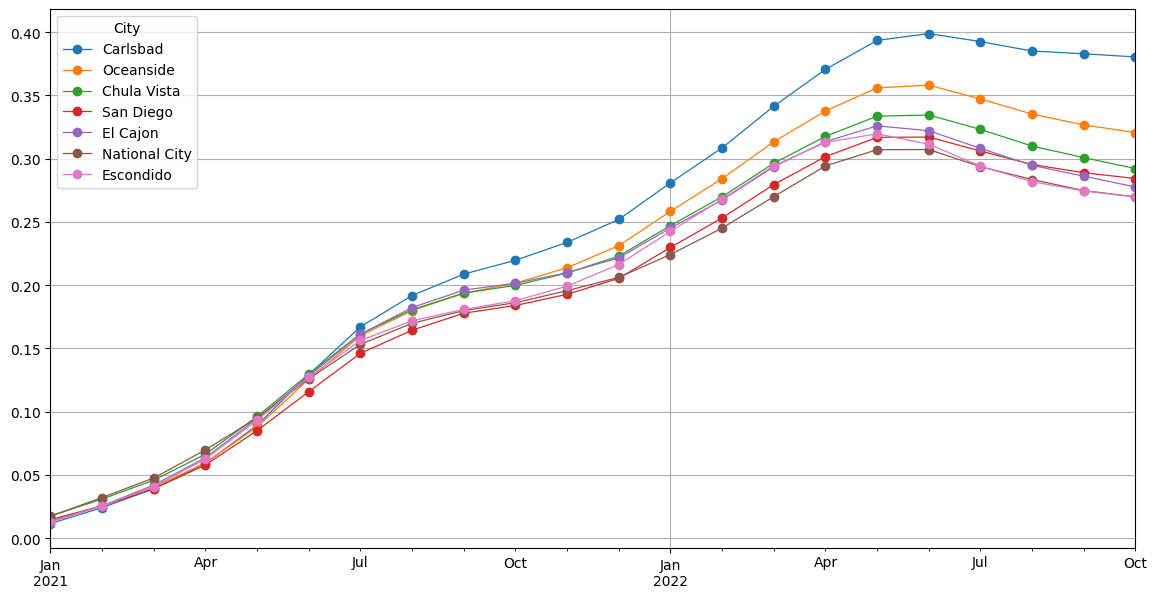

In [160]:
plot_top_accum(SDMetro['San Diego County'].groupby(level='City',axis=1).mean(), 3, 15)

/var/folders/dz/2jdnkp3541v0nxf__ztf1nw80000gn/T/ipykernel_88972/2731105828.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_top_accum(zhvi_timeseries_pct['CA','San Diego-Chula Vista-Carlsbad, CA','San Diego County','Chula Vista'],3,15)


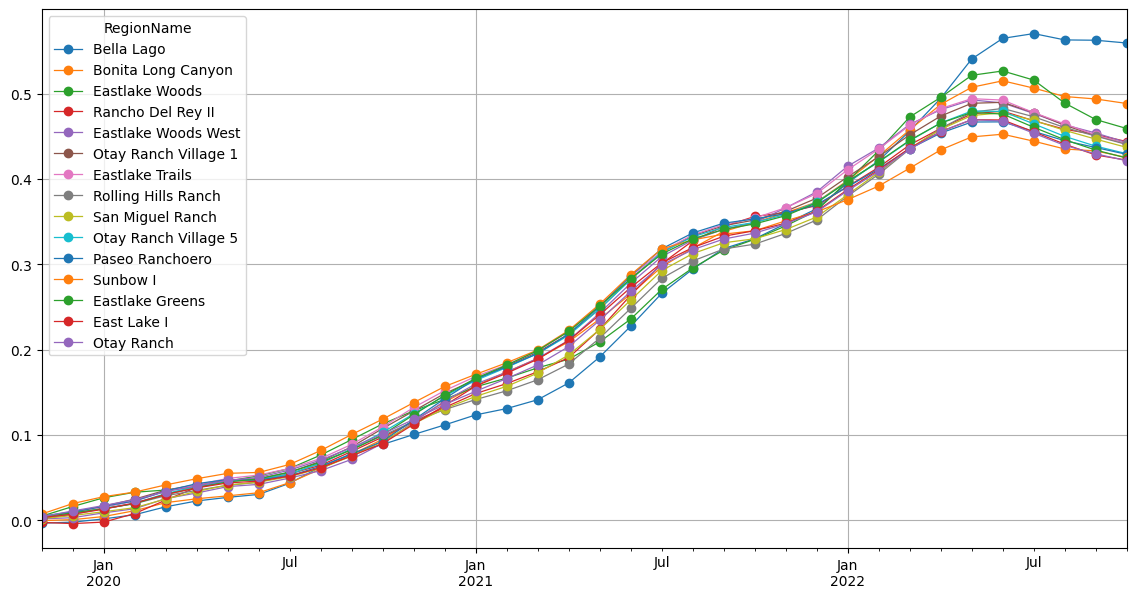

In [172]:
plot_top_accum(zhvi_timeseries_pct['CA','San Diego-Chula Vista-Carlsbad, CA','San Diego County','Chula Vista'],3,15)

In [19]:
la = zhvi_timeseries_pct[('CA','Los Angeles-Long Beach-Anaheim, CA','Los Angeles County','Los Angeles')]

/var/folders/dz/2jdnkp3541v0nxf__ztf1nw80000gn/T/ipykernel_87876/1246203421.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  la = zhvi_timeseries_pct[('CA','Los Angeles-Long Beach-Anaheim, CA','Los Angeles County','Los Angeles')]


<AxesSubplot: >

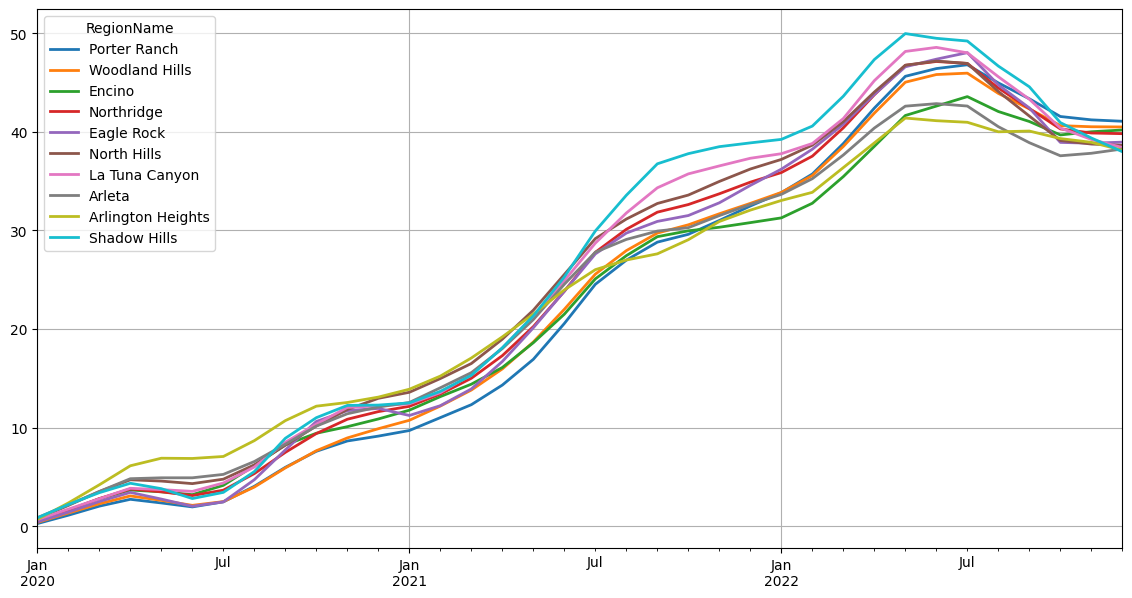

In [40]:
(np.expm1(np.log1p(la.iloc[-36:]).cumsum()).sort_values(by=la.index[-1],axis=1,ascending=False).iloc[:,:10]*100).plot(grid = True,
#         style = "-o",
        figsize = (14,7),
        linewidth = 2)